In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns

Funzione per disegnare i grafi ripresa in diverse parti di codice

In [3]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

___
### Crea un grafo come quello in figura. Disegnare il grafo.

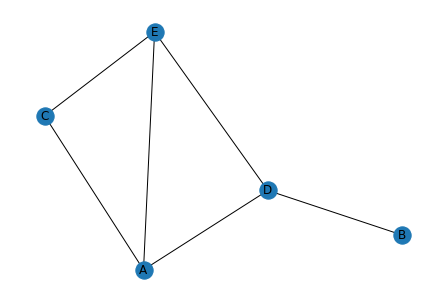

In [4]:
graph = nx.Graph()
graph.add_nodes_from(["A", "B", "C", "D", "E"])
graph.add_edges_from([("A", "E"), ("A", "C"), ("A", "D"), ("C", "E"), ("E", "D"), ("D", "B")])
nx.draw(graph, with_labels=True)

___
### Crea un grafo come quello precedente dove il peso dell’arco è un numero casuale tra 1 e 5. Disegnare il grafo.

In [5]:
edges = [("A", "E"), ("A", "C"), ("A", "D"), ("C", "E"), ("E", "D"), ("D", "B")]
weighted_edges = []
for edge in edges:
    weighted_edges.append((*edge, random.randint(0, 10)))

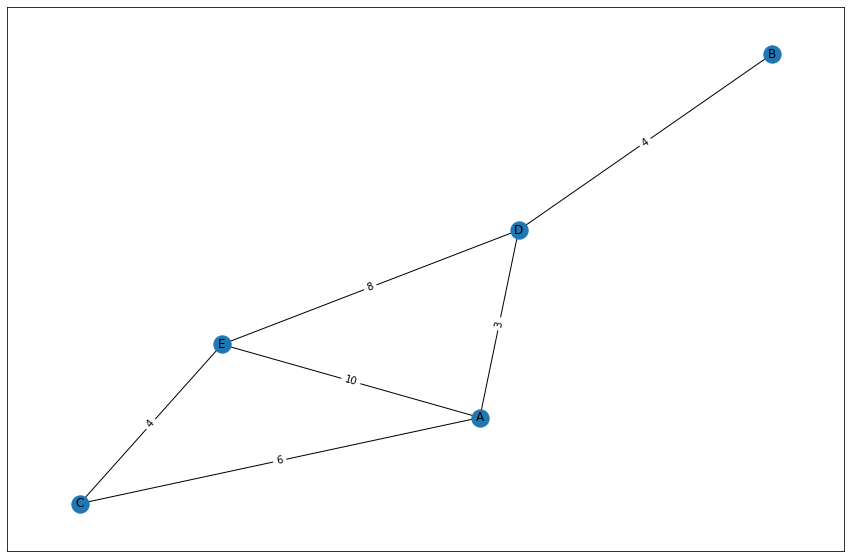

In [6]:
plt.figure(figsize=(15,10))
graph = nx.Graph()
graph.add_nodes_from(["A", "B", "C", "D", "E"])
graph.add_weighted_edges_from(weighted_edges)
pos = nx.spring_layout(graph)
nx.draw_networkx(graph,pos)
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.show()

___
### Analisi descrittiva e centralità

In [6]:
graph = nx.florentine_families_graph()

Poi andiamo a vedere il numero di nodi tramite graph.nodes
Attenzione che se vogliamo andare a vedere i singoli elementi, dobbiamo inserire questo in una lista e poi andare da li a prendere gli elementi in questo modo list(graph.nodes)[0]


In [ ]:
list(graph.nodes)[0]

Andiamo a vedere le varie caratteristiche del grafo
- Il numero di nodi
- Il numero di archi
- La densità che è calcolata con il rapporto del numero di archi che ha sul numero degli archi se il grafico fosse completo
- Il clustering (simile alla densità però da un info un po' diversa)

In [7]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
print("RAGGIO: ", nx.radius(graph))
print("DIAMETRO: ", nx.diameter(graph))
print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  15
EDGES:  20
CLUSTERING:  0.16


In [ ]:
nx.clustering(graph)

E andiamo a visualizzare la rete, il layout lo scegliamo noi a seconda di come potrebbe vedersi meglio la nostra rete

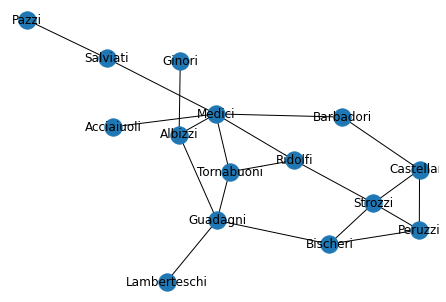

In [8]:
nx.draw(graph, pos = nx.spring_layout(graph), with_labels=True)

In [ ]:
nx.draw(graph, pos = nx.circular_layout(graph), with_labels=True)

Grazie alla funzione degree_centrality posso andar avedere la degree centrality appunto di ogni nodo, quindi ci printerà in output un dizionario dove per ogni nodo avremo il valore della sua centralità

In [ ]:
nx.degree_centrality(graph)

Questo codice viene utilizzato per ridurre il numero di label nel caso ci siano tanti nodi in modo da far visualizzare solo quelli con la centralità più alta, quindi solo quelli più importanti

In [ ]:
#cambiare visualizzazione
degree = nx.degree_centrality(graph)
labels = {} # quale nodo deve avere quale label
for key, value in degree.items():
    if value > 0.4: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

Grazie alla funzione betweenness_centrality() andiamo a calcolarci l'omonima centralità che ci dice non solo quelli che hanno una centralità elevata ma anche chi sono quei nodi esterni che sono rappresentati con centralità pari a zero.

è inoltre scontato avere pochi nodi con valore di centralità elevata in quasi tutte le analisi di centralità (tranne forse la closeness) perchè hanno una distribuzione a Power Law cioè ci sono pochi nodi che hanno valori alti e molti nodi che hanno valori bassi.

<AxesSubplot:>

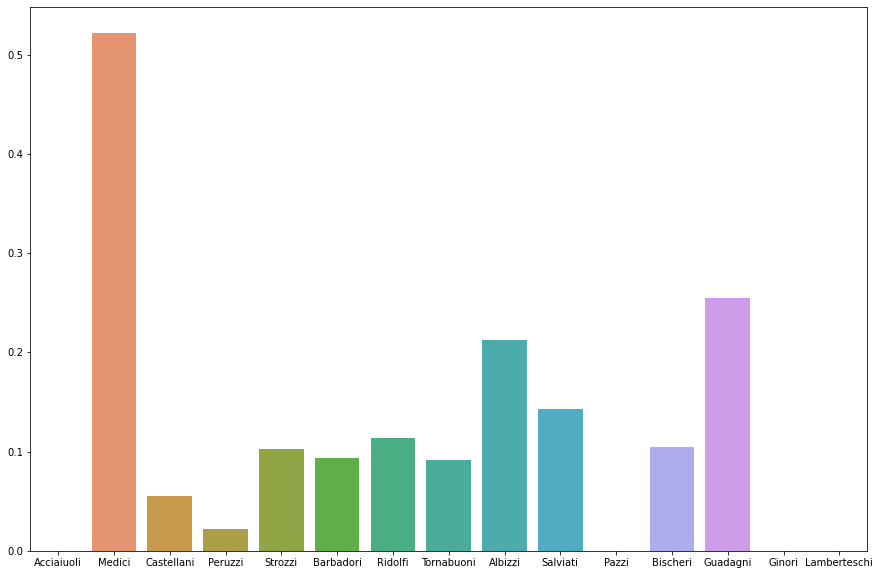

In [9]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.barplot(list(bet.keys()), list(bet.values()))

L'ultima analisi di centralità che fa vedere Michele è la closeness.

<AxesSubplot:>

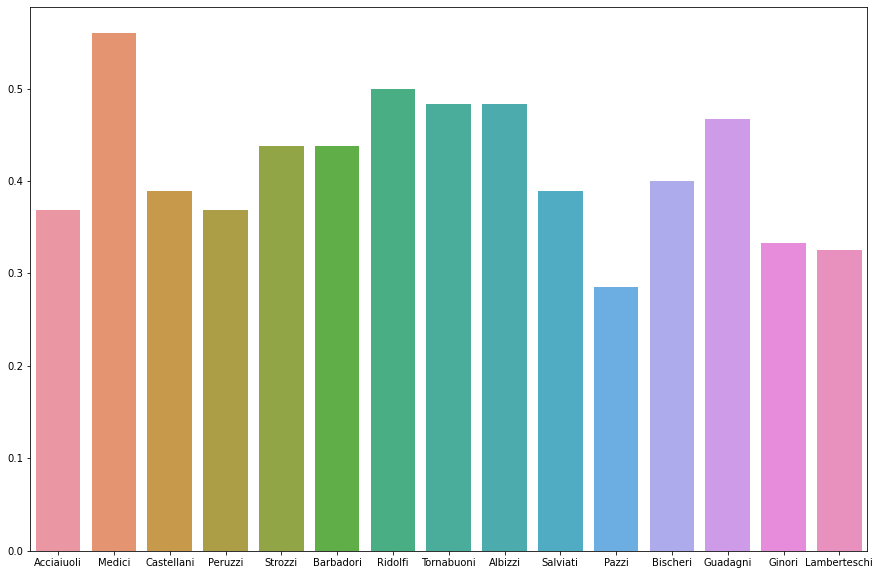

In [10]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.barplot(list(clos.keys()), list(clos.values()))

NOI POTREMMO AGGIUNGERE ANCHE LA EIGHENVECTOR CENTRALITY MA SOPRATTUTTO LA PAGERANK CENTRALITY PERCHè MICHELE NON LA FA VEDERE SICCOME PER ESSA è NECESSARIO UN GRAFO ORIENTATO, QUINDI NOI POTREMMO FARLA VEDERE. (li ho scritti velocemente qui sotto)

In [ ]:
eigv = nx.eigenvector_centrality(graph)
plt.figure(figsize=(15,10))
sns.barplot(list(eigv.keys()), list(eigv.values()))

In [ ]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.barplot(list(pager.keys()), list(pager.values()))

Sebbene sia veloce far vedere il grafico a barre di tali centralità, non è molto utile e avendo sepsso a che fare con moltissimi nodi questo grafico perderebbe di senso, se ne mostriamo pochi di essi, quello che invece è davvero interessante è far vedere la loro distribuzione tramite il displot().

Dove possiamo osservare appunto l'andamento a Power Law di ciascuna centralità tranne la Closseness che di solito si va a distribuire maggiormente nei valori medi.

In [ ]:
sns.displot(list(bet.value()))

In [ ]:
sns.displot(list(clos.value()))

In [ ]:
sns.displot(list(eigv.value()))

In [ ]:
sns.displot(list(pager.value()))

___
### Come caricare e parsare un documento di testo su NetworkX

Andiamo a caricare il documento di testo facendo poi un ciclo for che prendendo ogni riga va poi a creare gli archi in base a ciò che c'è scritto nel documento di testo

In [11]:
edges = []
with open("facebook_combined.txt", "r") as f:
    for line in f:
        s = line.strip()
        a, b = s.split(" ")
        edges.append((int(a),int(b)))

E quindi poi creo il grafo andando a generarlo tramite gli archi che ho ricavato prima dal documento di testo.

In [12]:
graph = nx.Graph()
graph.add_edges_from(edges)
pos = nx.spring_layout(graph)

E andiamo a vedere tutte le caratteristiche classiche del grafo

In [13]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
print("RAGGIO: ", nx.radius(graph))
print("DIAMETRO: ", nx.diameter(graph))
print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  4039
EDGES:  88234


E faccio il plot del grafo per visualizzarlo

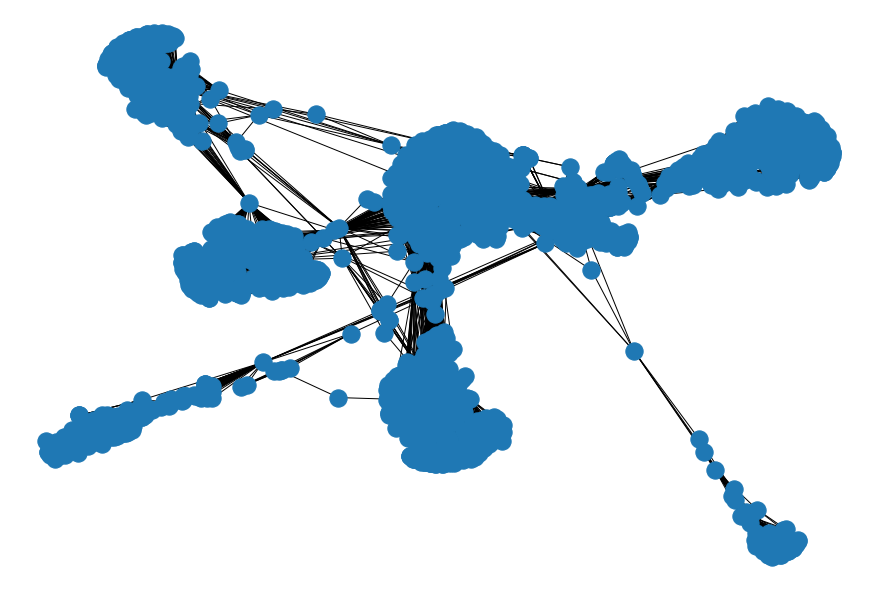

In [14]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

Calcolo la degree centrality e vado a plottare la distribuzione

<AxesSubplot:>

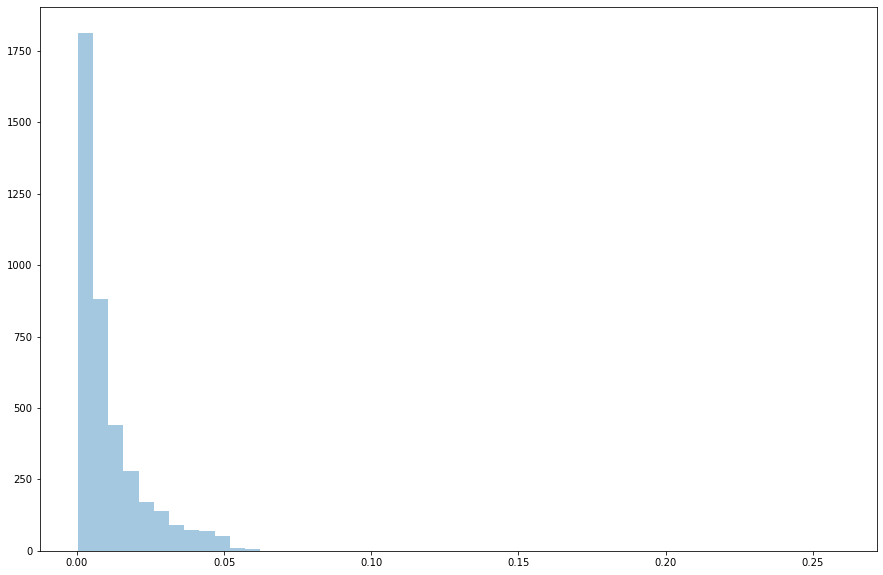

In [15]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.distplot(list(degree.values()), kde=False)

E posso anche colorare i nodi del grafo in base al valore della sua centralità.

<ipython-input-2-4c850126ed27>:6: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))


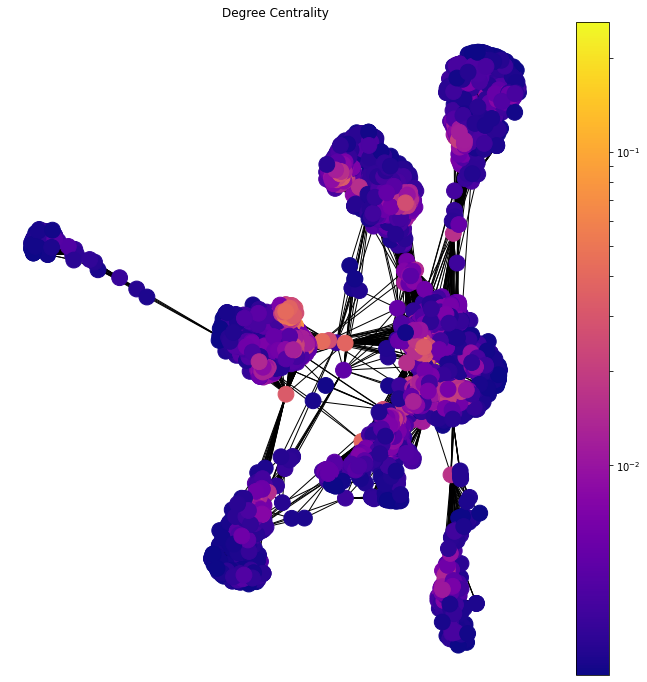

In [16]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

Posso anche cambiare la posizione dei noi ma fa molto schifo con questo layout a spirale.

<ipython-input-2-4c850126ed27>:6: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))


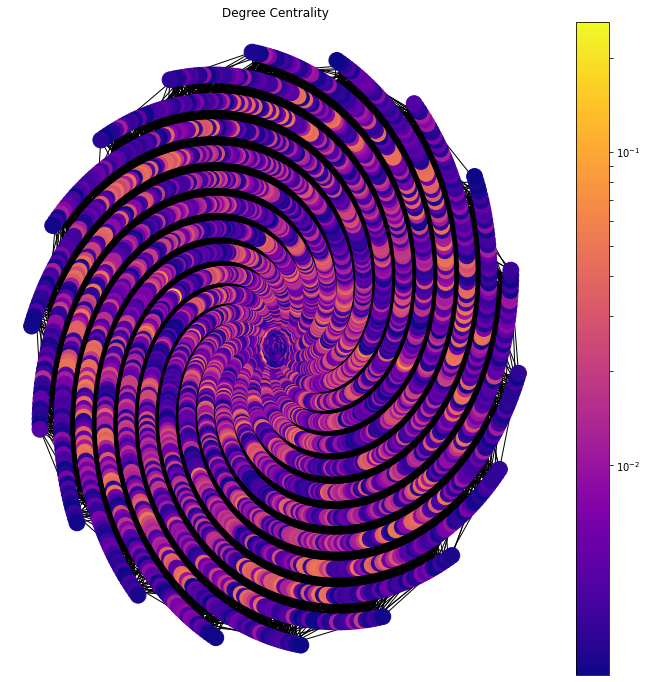

In [17]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

<AxesSubplot:>

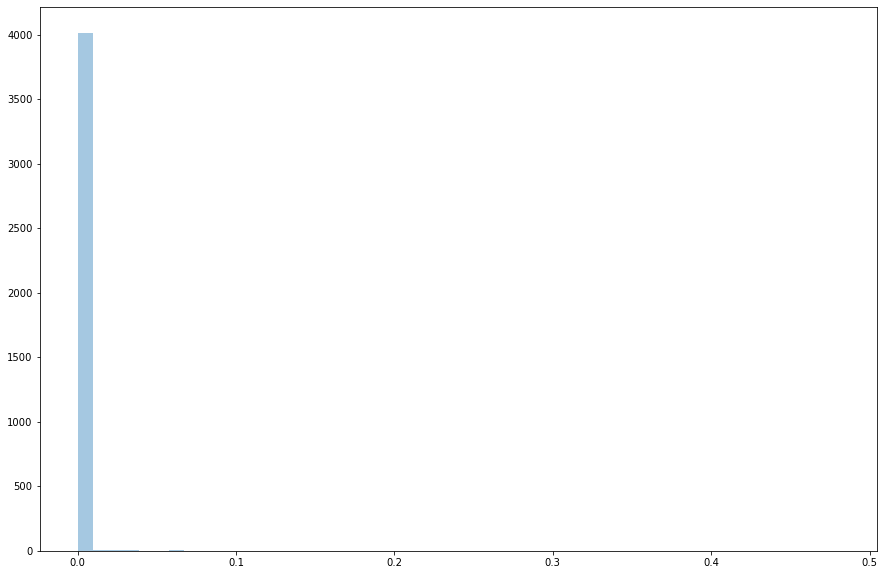

In [18]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.distplot(list(bet.values()), kde=False)

Infine abbiamo un algoritmo per calcolare la modularità e quindi restituisce i nodi che fanno parte delle varie comunità.

Quindi ci restituisce una lista di liste in cui ogni elemento appunto è una lista di nodi e quindi possiamo andare a vedere le varie comunità.

In [19]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({897,
            899,
            906,
            908,
            916,
            920,
            921,
            922,
            923,
            925,
            926,
            927,
            928,
            929,
            932,
            934,
            946,
            947,
            950,
            951,
            952,
            953,
            959,
            960,
            961,
            966,
            967,
            970,
            972,
            973,
            978,
            980,
            982,
            983,
            990,
            991,
            993,
            995,
            996,
            997,
            998,
            999,
            1003,
            1004,
            1006,
            1008,
            1017,
            1023,
            1024,
            1026,
            1028,
            1029,
            1031,
            1033,
            1034,
            1038,
            1039,
            1040

E possiamo avere velocemente quante sono le community andando a vedere la lunghezza della lista

In [ ]:
len(communities)